In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [8]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 7650099.23it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28786999.48it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 4259311.78it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4528293.03it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [9]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

In [35]:
class Net(nn.Module):
    #def __init__(self):
        #super(Net, self).__init__()
        #self.fc1 = nn.Linear(28*28, 128)
        #self.fc2 = nn.Linear(128, 64)
        #self.fc3 = nn.Linear(64, 10)

    #def forward(self, x):
        #x = x.view(-1, 28*28)
        #x = nn.functional.relu(self.fc1(x))
        #x = nn.functional.relu(self.fc2(x))
        #x = self.fc3(x)
        #return x
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.relu(self.fc5(x))
        x = nn.functional.log_softmax(self.fc6(x), dim=1)
        return x

In [36]:
net = Net()

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [38]:
# Обучение нейронной сети
train_losses, test_losses = [], []
for epoch in range(1, 100):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' % (epoch, i + 1, running_loss / 200))
            running_loss = 0.0

    train_losses.append(running_loss / len(trainloader))

    # Вычисление потерь на тестовом датасете
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        for images, labels in testloader:
            logps = net(images)
            test_loss += criterion(logps, labels)

            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))

    test_losses.append(test_loss / len(testloader))

    print(f"Epoch {epoch}/{10}.. "
          f"Train loss: {running_loss/len(trainloader):.3f}.. "
          f"Test loss: {test_loss/len(testloader):.3f}.. "
          f"Test accuracy: {accuracy/len(testloader):.3f}")

[1,   200] loss: 2.302
[1,   400] loss: 2.297
[1,   600] loss: 2.291
[1,   800] loss: 2.281
Epoch 1/10.. Train loss: 0.334.. Test loss: 2.256.. Test accuracy: 0.194
[2,   200] loss: 2.231
[2,   400] loss: 2.065
[2,   600] loss: 1.591
[2,   800] loss: 1.205
Epoch 2/10.. Train loss: 0.154.. Test loss: 0.968.. Test accuracy: 0.682
[3,   200] loss: 0.845
[3,   400] loss: 0.649
[3,   600] loss: 0.560
[3,   800] loss: 0.482
Epoch 3/10.. Train loss: 0.070.. Test loss: 0.433.. Test accuracy: 0.868
[4,   200] loss: 0.416
[4,   400] loss: 0.383
[4,   600] loss: 0.358
[4,   800] loss: 0.354
Epoch 4/10.. Train loss: 0.050.. Test loss: 0.315.. Test accuracy: 0.906
[5,   200] loss: 0.301
[5,   400] loss: 0.305
[5,   600] loss: 0.276
[5,   800] loss: 0.277
Epoch 5/10.. Train loss: 0.038.. Test loss: 0.240.. Test accuracy: 0.930
[6,   200] loss: 0.248
[6,   400] loss: 0.227
[6,   600] loss: 0.221
[6,   800] loss: 0.212
Epoch 6/10.. Train loss: 0.030.. Test loss: 0.197.. Test accuracy: 0.939
[7,   200]

Epoch 49/10.. Train loss: 0.000.. Test loss: 0.103.. Test accuracy: 0.979
[50,   200] loss: 0.001
[50,   400] loss: 0.001
[50,   600] loss: 0.001
[50,   800] loss: 0.001
Epoch 50/10.. Train loss: 0.000.. Test loss: 0.103.. Test accuracy: 0.979
[51,   200] loss: 0.001
[51,   400] loss: 0.000
[51,   600] loss: 0.001
[51,   800] loss: 0.001
Epoch 51/10.. Train loss: 0.000.. Test loss: 0.103.. Test accuracy: 0.979
[52,   200] loss: 0.001
[52,   400] loss: 0.001
[52,   600] loss: 0.001
[52,   800] loss: 0.001
Epoch 52/10.. Train loss: 0.000.. Test loss: 0.105.. Test accuracy: 0.978
[53,   200] loss: 0.001
[53,   400] loss: 0.000
[53,   600] loss: 0.001
[53,   800] loss: 0.001
Epoch 53/10.. Train loss: 0.000.. Test loss: 0.106.. Test accuracy: 0.978
[54,   200] loss: 0.000
[54,   400] loss: 0.000
[54,   600] loss: 0.000
[54,   800] loss: 0.001
Epoch 54/10.. Train loss: 0.000.. Test loss: 0.108.. Test accuracy: 0.978
[55,   200] loss: 0.000
[55,   400] loss: 0.000
[55,   600] loss: 0.001
[55,

[98,   200] loss: 0.000
[98,   400] loss: 0.000
[98,   600] loss: 0.000
[98,   800] loss: 0.000
Epoch 98/10.. Train loss: 0.000.. Test loss: 0.121.. Test accuracy: 0.979
[99,   200] loss: 0.000
[99,   400] loss: 0.000
[99,   600] loss: 0.000
[99,   800] loss: 0.000
Epoch 99/10.. Train loss: 0.000.. Test loss: 0.121.. Test accuracy: 0.979


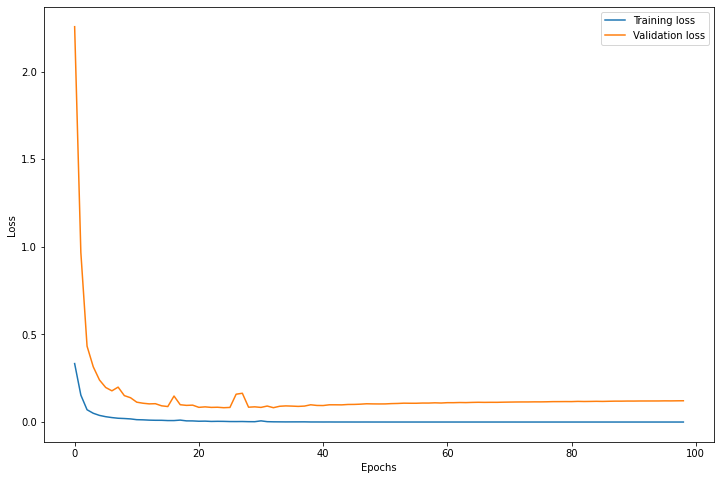

In [40]:
import matplotlib.pyplot as plt

# Визуализация результатов
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_losses, label='Training loss')
ax.plot(test_losses, label='Validation loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.show()



#### Действия, которые могут привести к переобучению:

Увеличение количества эпох обучения. Большее количество эпох может привести к тому, что модель будет лучше запоминать обучающие данные и хуже обобщать на новые данные.

Увеличение количества параметров модели. Например, можно увеличить количество нейронов в полносвязных слоях или добавить новые слои.